In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from timeit import default_timer as timer
import pandas as pd
from google.colab import autoviz

The following code was my first attempt at making the collatz function, I tried to basically catch the values and keep an array of the sequence. I did take what I learned about the sequence for future reference.

In [ ]:
#I tried to optimize the collatz at first but I couldn't find a way to append to the list so I tried to make it a fixed length but I can't go past it, so its best for analyzing the first n digits of a sequence

def optcollatz(num):
    arr = np.zeros(num + 1, dtype=np.int64)
    for i in range(2, num + 1):
        # If mod(4) == 1: Value 2 or 3 Cached, I tried to cache the function since caching transforms a method of a class into a property
        #whose value is computed once and then cached as a normal attribute for the life of the instance.
        #Similar to property(), with the addition of caching. Useful for expensive computed properties of instances that are otherwise effectively immutable.
        #Problem is that This decorator requires that the dict attribute on each instance be a mutable mapping. This means it will not work with some types, such as metaclasses
        if i % 4 == 1:
            arr[i] = arr[(i + (i >> 1) + 1) // 2] + 3
        # If mod(4) == 3 then use Algorithm
        elif i % 4 == 3:
            k = i
            count = 0
            while k >= i:
                if k % 2:
                    k += (k >> 1) + 1
                    count += 2
                else:
                    k //= 2
                    count += 1
            arr[i] = arr[k] + count
        # If mod(4) == 2 or 4: Value 1 Cached
        else:
            arr[i] = arr[(i // 2)] + 1
    return arr


# Example usage:
num = 7
sequence_lengths = optcollatz(num)
print(sequence_lengths)


[ 0  0  1  7  2  5  8 16]


This code has no actual present in the rest since I developed a dictionary to hold the sequences and could access it in constant time. I wanted to arrange the sequences in a tree earlier so that it could be easily sorted by length with the root being the min but it would take too long to impliment and wouldn't give me much ideas on the relationship between the numbers and length.

In [ ]:
def collatz_len(i): # new sequence to find length, its better to now just go through the dict values
    count = 0
    while i > 1:
        if i % 2 == 0:
            i = i // 2
        else:
            i = (3 * i) + 1
        count = count + 1
    return count

In [ ]:
def collatz_sequence(n): #I then decided to create a sequence that did store the sequence in an array for later access
    sequence = [n]
    while n != 1:
        if n % 2 == 0:
            n //= 2
        else:
            n = 3 * n + 1
        sequence.append(n)
    return sequence

starting_number = 7
sequence = collatz_sequence(starting_number)
print(f"Collatz sequence for {starting_number}: {sequence}") # since dicts have an O(1) time, when repeately accessing the sequence of the numbers, it'll be more efficient

Collatz sequence for 7: [7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


In [ ]:
dic = {}
for n in range(1, 10001):
  sequence = collatz_sequence(n)
  dic[n] = (sequence)


In [ ]:
collatz_data = []
for n in dic:
  collatz_data.append((n, len(dic[n]), dic[n][len(dic[n])//2], max(dic[n]), sum(dic[n])/len(dic[n]), dic[n].index(n),(sum(dic[n])/len(dic[n]))/len(dic[n])))

Following this point, I had to rely heavily on ChatGPT and working with my peers since I have no experience in data vizualization.

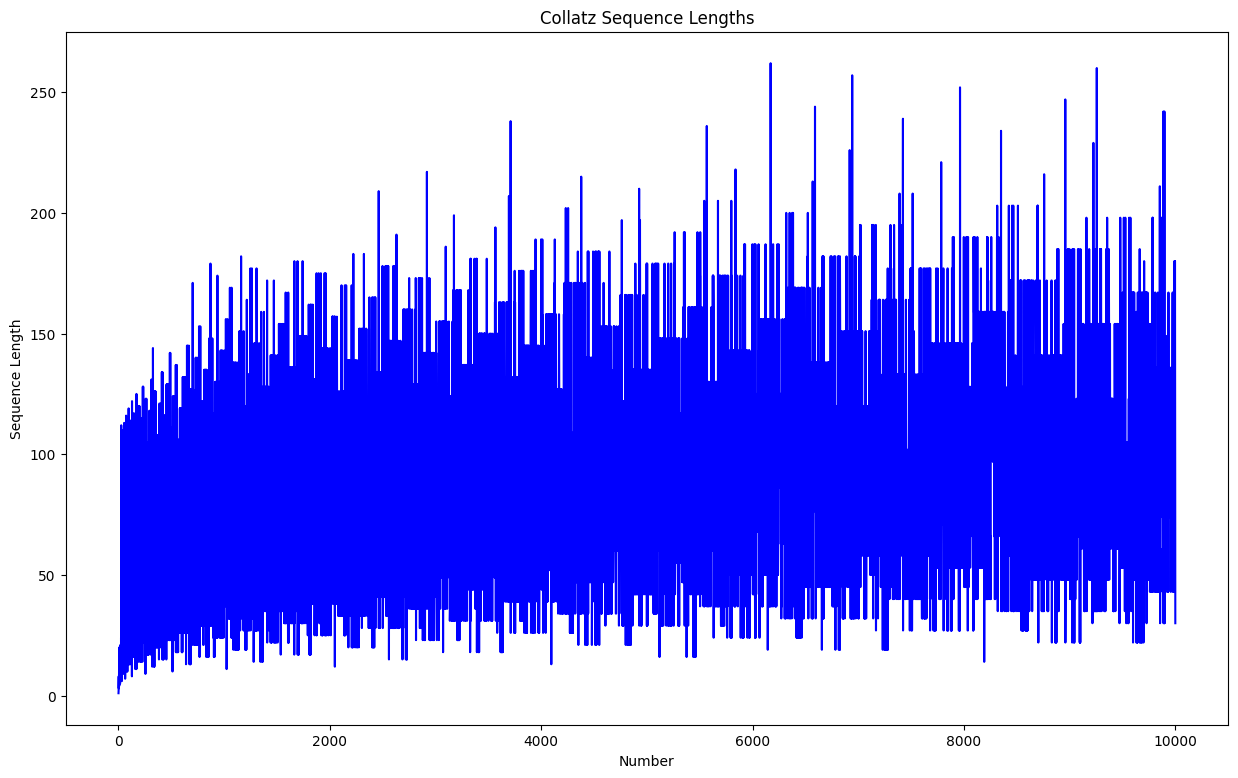

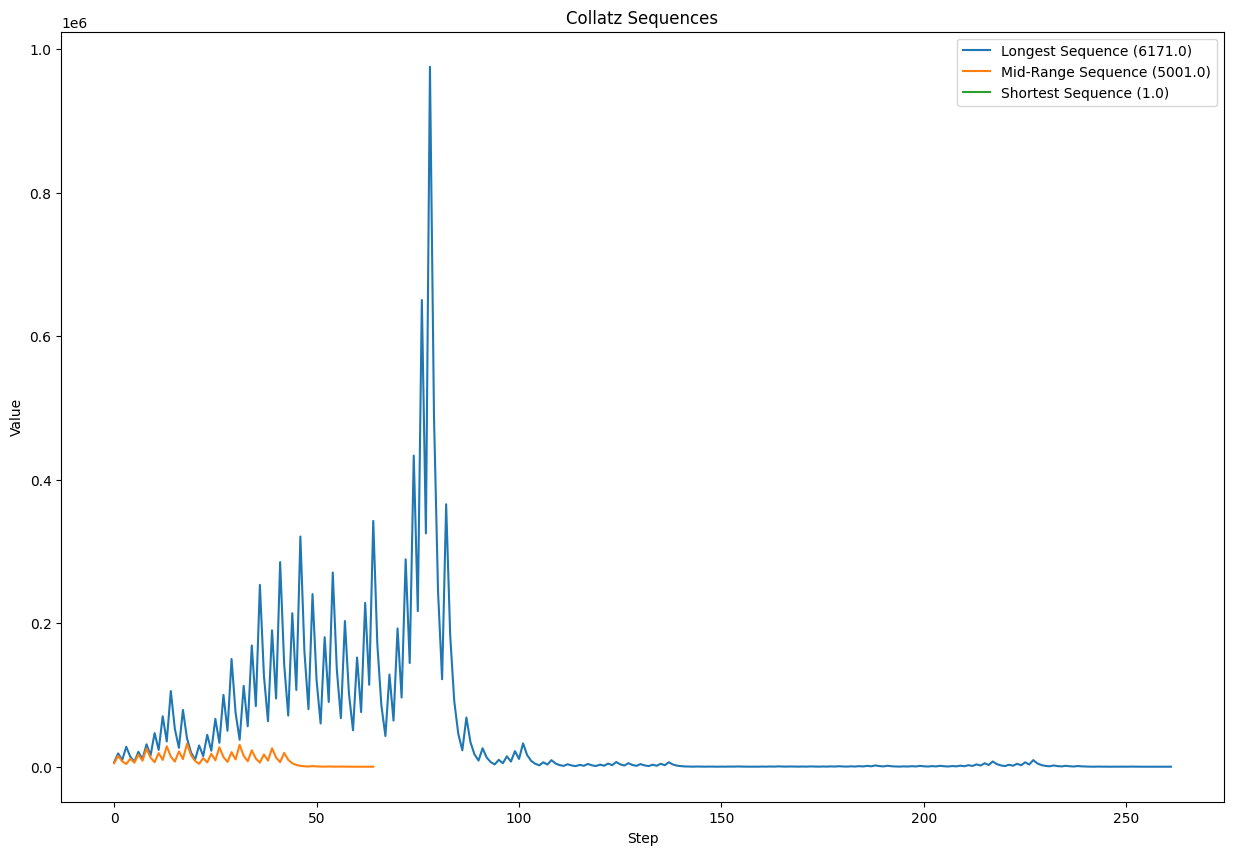

In [ ]:
# Creating Data Frame
df = pd.DataFrame(collatz_data, columns=['Number', 'Sequence Length', 'Final Halfway Point', 'Max Value in Sequence', 'Mean Value in Sequence', 'Index Ratio','Mean Ratio'])
#ChatGPT helped with this part of organizing the data
# Plot Sequence Length
plt.figure(figsize=(15, 9))
plt.plot(df['Number'], df['Sequence Length'], color='blue')
plt.xlabel('Number')
plt.ylabel('Sequence Length')
plt.title('Collatz Sequence Lengths')
plt.show()

# Visualize Specific Sequences
max_seq = df.loc[df['Sequence Length'].idxmax()]['Number']
mid_range_seq = df.loc[df['Sequence Length'].idxmin() + 5000]['Number']
min_seq = df.loc[df['Sequence Length'].idxmin()]['Number']

max_seq_data = collatz_sequence(max_seq)
mid_range_seq_data = collatz_sequence(mid_range_seq)
min_seq_data = collatz_sequence(min_seq)

plt.figure(figsize=(15, 10))
plt.plot(max_seq_data, label=f'Longest Sequence ({max_seq})')
plt.plot(mid_range_seq_data, label=f'Mid-Range Sequence ({mid_range_seq})')
plt.plot(min_seq_data, label=f'Shortest Sequence ({min_seq})')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Collatz Sequences')
plt.legend()
plt.show()
# Save DataFrame to CSV
df.to_csv('collatz_dataset.csv', index=False)


In [ ]:
df.describe()

,Number,Sequence Length,Final Halfway Point,Max Value in Sequence,Mean Value in Sequence,Index Ratio,Mean Ratio
count,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.000000
mean,5000.50000,85.966600,3.820794e+03,5.899648e+04,4.905964e+03,0.0,49.195260
std,2886.89568,46.590863,2.265694e+04,4.136801e+05,2.392937e+04,0.0,142.634282
min,1.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.670000
25%,2500.75000,46.000000,1.600000e+02,9.232000e+03,9.729018e+02,0.0,10.686413
50%,5000.50000,74.000000,4.720000e+02,1.333600e+04,1.506793e+03,0.0,20.614550
75%,7500.25000,126.000000,1.276000e+03,3.227200e+04,3.249738e+03,0.0,47.016182
max,10000.00000,262.000000,1.212064e+06,2.711442e+07,1.383242e+06,0.0,7476.985157


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Number'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Sequence Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Final Halfway Point'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Max Value in Sequence'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Number'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Sequence Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Final Halfway Point'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Max Value in Sequence'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Number', 'Sequence Length'], ['Sequence Length', 'Final Halfway Point'], ['Final Halfway Point', 'Max Value in Sequence'], ['Max Value in Sequence', 'Mean Value in Sequence']]], **{})
chart

In [ ]:
df

,Number,Sequence Length,Final Halfway Point,Max Value in Sequence,Mean Value in Sequence,Index Ratio,Mean Ratio
0,1,1,1,1,1.000000,0,1.000000
1,2,2,1,2,1.500000,0,0.750000
2,3,8,8,16,6.125000,0,0.765625
3,4,3,2,4,2.333333,0,0.777778
4,5,6,4,16,6.000000,0,1.000000
...,...,...,...,...,...,...,...
9995,9996,180,83501,250504,24941.105556,0,138.561698
9996,9997,180,83501,250504,25149.394444,0,139.718858
9997,9998,92,2429,33748,3098.858696,0,33.683247
9998,9999,92,2429,101248,5765.293478,0,62.666233


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Number'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Sequence Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Final Halfway Point'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Max Value in Sequence'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Number'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Sequence Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Final Halfway Point'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Max Value in Sequence'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Number', 'Sequence Length'], ['Sequence Length', 'Final Halfway Point'], ['Final Halfway Point', 'Max Value in Sequence'], ['Max Value in Sequence', 'Mean Value in Sequence']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Number', 'Sequence Length', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Number', 'Final Halfway Point', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Number', 'Max Value in Sequence', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Number', 'Mean Value in Sequence', None], **{})
chart

In [ ]:
def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[df['Number'] % 2 != 0][colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Sequence Length'], **{})
chart

In [ ]:
def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Number', 'Sequence Length'], ['Sequence Length', 'Final Halfway Point'], ['Final Halfway Point', 'Max Value in Sequence'], ['Max Value in Sequence', 'Mean Value in Sequence']]], **{})
chart